In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error

## Regression KNN 

In [68]:
X, y = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=2, random_state=21)

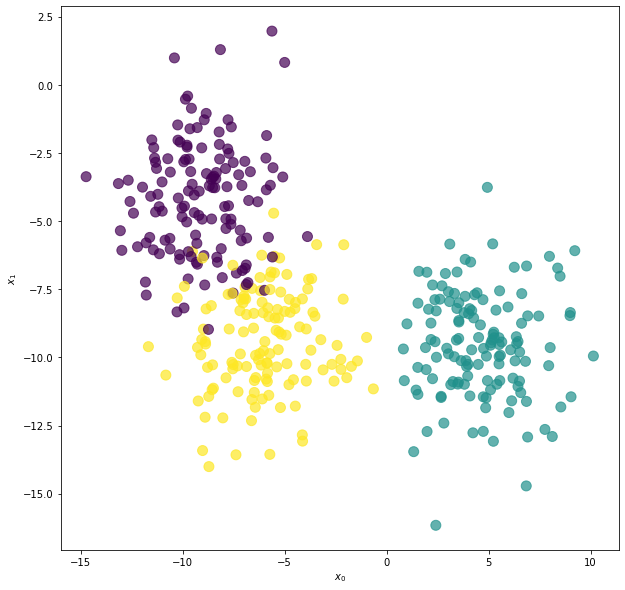

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.7)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
neighbors = range(1, 50)
train_errors = []
test_errors = []

for neighbor in (neighbors):
    knn_reg = KNeighborsRegressor(n_neighbors=neighbor)
    knn_reg.fit(X_train, y_train)
    
    train_predictions = knn_reg.predict(X_train)
    test_predictions = knn_reg.predict(X_test)
    
    train_error = mean_squared_error(train_predictions, y_train)
    test_error = mean_squared_error(test_predictions, y_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    

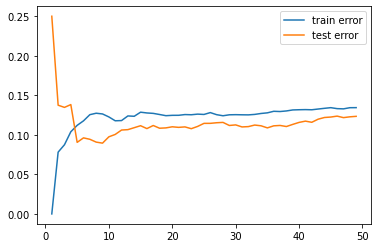

In [7]:
plt.plot(neighbors, train_errors, label="train error")
plt.plot(neighbors, test_errors, label="test error")
plt.legend()

In [8]:
np.min(train_errors)

0.0

In [9]:
np.max(test_errors)

0.25

In [10]:
def get_class_colour(label):
    return "blue" if label else "orange"

In [11]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], s=100, edgecolor='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")

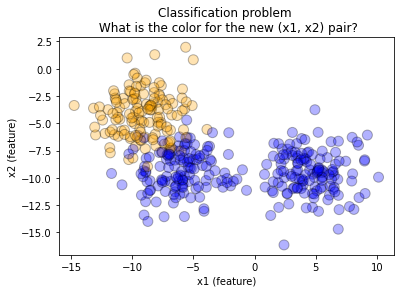

In [12]:
plot_points(X, y)

## Classification KNN

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
neighbors = range(1, 80)
train_errors = []
test_errors = []

for neighbor in (neighbors):
    knn_cl = KNeighborsClassifier(n_neighbors=neighbor)
    knn_cl.fit(X_train, y_train)
    
    train_predictions = knn_cl.predict(X_train)
    test_predictions = knn_cl.predict(X_test)
    
    train_error = accuracy_score(train_predictions, y_train)
    test_error = accuracy_score(test_predictions, y_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    

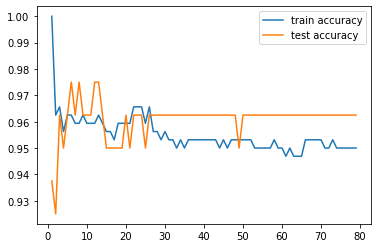

In [15]:
plt.plot(neighbors, train_errors, label="train accuracy")
plt.plot(neighbors, test_errors, label="test accuracy")
plt.legend()

In [20]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()] # concatenation

In [21]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap="Oranges")

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap="Oranges")


/var/folders/tr/sbq7rzq91r3cc22nhkdvgfp80000gn/T/ipykernel_5861/1557312070.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap="Oranges")


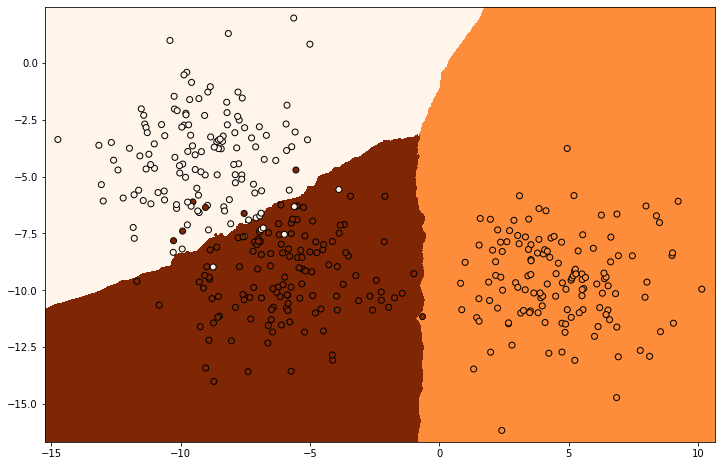

In [22]:
plot_knn_classifier(30)

## Cross Validation learning

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

In [24]:
X = 10 * np.random.rand(100, 1).reshape(-1, 1)
y = X + np.random.randn(100, 1) * 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

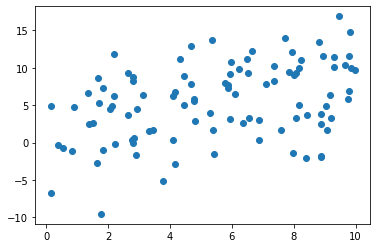

In [25]:
plt.scatter(X, y)

In [26]:
#using piplines

reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    LinearRegression()
    
)
reg.fit(X_train, y_train)
scores = cross_val_score(reg, X, y, cv=5, scoring="neg_mean_squared_error")
scores

array([-31.64340293, -25.19074695, -15.13986913, -17.63846608,
       -22.16799084])

In [27]:
(scores.mean(), scores.std())

(-22.356095184319237, 5.80783370521872)

In [28]:
#using piplines

r_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge(alpha=0.5)
)

r_reg.fit(X_train, y_train)

scores = cross_val_score(r_reg, X, y, cv=5, scoring="neg_mean_squared_error")

In [29]:
scores

array([-31.8089285 , -24.33712417, -15.26986995, -17.86687503,
       -21.99360591])

In [30]:
(scores.mean(), scores.std())

(-22.255280712133747, 5.722391106437285)

## GridSearchCV

In [31]:
param_grid = [
    {
        "ridge__alpha" : [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 0.1, 1, 2,2.5 , 3, 4, 5, 6, 7, 8], 
        "polynomialfeatures__degree" : list(range(1, 3))}]

reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge()
)

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring="neg_mean_squared_error")

In [32]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid=[{'polynomialfeatures__degree': [1, 2],
                          'ridge__alpha': [1e-08, 1e-06, 0.0001, 0.001, 0.01,
                                           0.1, 1, 2, 2.5, 3, 4, 5, 6, 7, 8]}],
             scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 4}

In [34]:
grid_search.best_estimator_

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=4))])

## RandomizedSearchCV

In [35]:
random_search = RandomizedSearchCV(reg, param_grid[0], cv=5, scoring="neg_mean_squared_error")

In [36]:
random_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   param_distributions={'polynomialfeatures__degree': [1, 2],
                                        'ridge__alpha': [1e-08, 1e-06, 0.0001,
                                                         0.001, 0.01, 0.1, 1, 2,
                                                         2.5, 3, 4, 5, 6, 7,
                                                         8]},
                   scoring='neg_mean_squared_error')

In [37]:
random_search.best_estimator_

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=2.5))])

In [38]:
random_search.best_params_

{'ridge__alpha': 2.5, 'polynomialfeatures__degree': 1}

## KNN Regression

In [39]:
X = np.random.randn(100, 1) *10
y = 2 * X + np.random.randn(100, 1) * 10

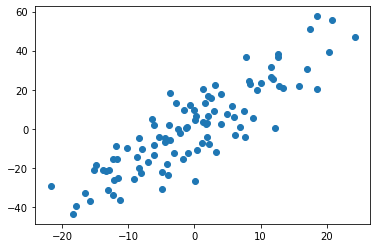

In [40]:
plt.scatter(X, y)

In [41]:
X_new = np.random.randn(500, 1) * 2

In [42]:
reg_knn = KNeighborsRegressor(n_neighbors=3)
reg_knn.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [43]:
y_predicted = reg_knn.predict(X_new)

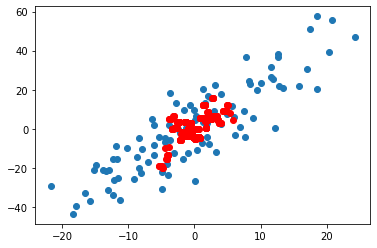

In [44]:
plt.scatter(X, y)
plt.scatter(X_new, y_predicted, c='red')

In [45]:
from sklearn.base import BaseEstimator
from sklearn.metrics import euclidean_distances

class KNNRegressor(BaseEstimator):
    
    def __init__(self, neighbors=1):
        self.neighbors = neighbors
        

    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        y_predicted = []
        for i in range(X.shape[0]):
            dists_indexes_sorted = euclidean_distances(X[i].reshape(-1, 1), self.X).argsort().flatten()[:self.neighbors]
            y_predicted.append(self.y[dists_indexes_sorted].mean())
        
        return np.array(y_predicted)

In [46]:
X = np.random.randn(50, 1) * 2
y = 5 * X + np.random.randn(50, 1) * 5

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [48]:
reg = KNNRegressor(neighbors=3)

In [49]:
reg.fit(X_train, y_train)

In [50]:
y_predicted = reg.predict(X_test)

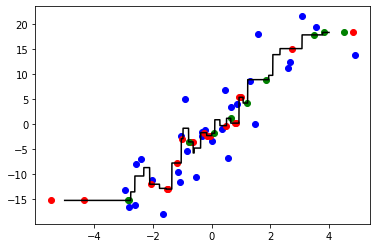

In [51]:
X_new = np.random.randn(10, 1) * 2
x_ = np.arange(-5, 4, .005)
plt.scatter(X_train, y_train, c="blue")
plt.scatter(X_test, y_predicted, c="red")
plt.scatter(X_new, reg.predict(X_new), c="green")
plt.plot(x_, reg.predict(x_.reshape(-1, 1)), c="black")

In [52]:
reg_knn_pipe = make_pipeline(
KNNRegressor())

In [53]:
param_grid = [{"knnregressor__neighbors" : np.arange(1, 50, 1)}]

In [54]:
grid_search = GridSearchCV(reg_knn_pipe, param_grid, cv=3, scoring="neg_mean_squared_error")

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('knnregressor', KNNRegressor())]),
             param_grid=[{'knnregressor__neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             scoring='neg_mean_squared_error')

In [56]:
grid_search.best_estimator_

Pipeline(steps=[('knnregressor', KNNRegressor(neighbors=2))])

In [75]:
class KNNClassificator(BaseEstimator):
    
    def __init__(self, neighbors=1):
        self.neighbors = neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        return self
        
    def predict(self, X):
        y_predicted = []
        for i in range(X.shape[0]):
            idx = euclidean_distances(X[i].reshape(-1, 2), self.X).argsort().flatten()[:self.neighbors]
            cls_dict = {f"{elem}" : 0 for elem in np.unique(self.y[idx])}
            for elem in self.y[idx]:
                cls_dict[f"{elem}"] += 1
    
            
            y_predicted.append(int(max(cls_dict)))
        
        return np.array(y_predicted)
        

In [76]:
clf = KNNClassificator(neighbors=3)

In [77]:
acc = []
for k_n in range(1, 20, 1):
    clf = KNNClassificator(neighbors=k_n).fit(X_train, y_train)
    acc.append((clf.predict(X_test) == y_test).sum() / y_test.shape[0])

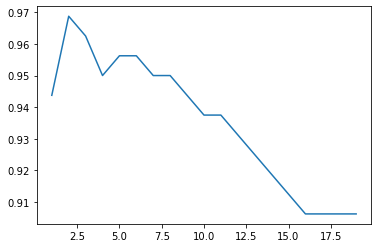

In [78]:
plt.plot(list(range(1, 20, 1)), acc[::1])

In [79]:
clf.fit(X_train, y_train)

KNNClassificator(neighbors=19)

In [80]:
(clf.predict(X_test) == y_test).sum() / y_test.shape[0]

0.90625

In [81]:
clf.predict(X_test)

array([0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1,
       1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1,
       2, 2, 2, 2, 1, 0])

In [82]:
def plot_knn_classifier(k):
    knn = KNNClassificator(neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap="Oranges")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap="Oranges")


In [83]:
h = .05
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()] # concatenation

/var/folders/tr/sbq7rzq91r3cc22nhkdvgfp80000gn/T/ipykernel_5861/2103977258.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap="Oranges")


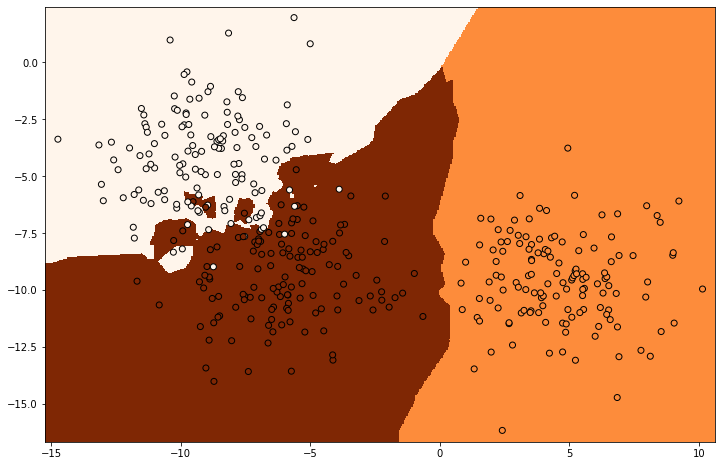

In [84]:
plot_knn_classifier(2)